[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cca-cce/osm-cca/blob/main/jnb/simm71/cv3_lab.ipynb)

# Research question

**Introduction**  
How can image embeddings generated from video frames of sustainability communication campaigns differentiate between authentic sustainability communication and greenwashing? By comparing frames from organizations like Preem (involved in fossil fuel industries) and Vattenfall (focused on renewable energy), this study aims to uncover patterns in visual communication that align with inauthentic or authentic sustainability messaging.

**Research Question**  
How can video frames from sustainability communication be analyzed using image embeddings to measure the degree of greenwashing compared to authentic sustainability communication?

**Proposed Investigation**  
Using the OpenAI CLIP model, this study will analyze the similarity between video frames and conceptual text descriptions such as "inauthentic greenwashing" and "authentic sustainability communication." This approach enables a semantic comparison between visual communication modalities and linguistic constructs of authenticity and greenwashing.

**Methodology**

1. **Image Embeddings**:
   - Extract image embeddings from video frames of sustainability communication campaigns using the CLIP model.
   - Compute cosine similarity between these embeddings and the embeddings of descriptive text strings ("inauthentic greenwashing" and "authentic sustainability communication").

2. **Frame-Level Analysis**:
   - For each video frame, calculate similarity scores with both descriptive text strings.
   - Categorize frames based on their relative similarity to these two semantic concepts.

3. **Aggregation**:
   - Compute aggregated similarity scores for entire videos to evaluate their overall alignment with either greenwashing or authentic communication narratives.
   - Compare aggregated scores between organizations to identify visual communication trends.

4. **Visualization**:
   - Create similarity heatmaps and timelines to illustrate fluctuations in communication styles across video frames.
   - Generate comparative visualizations to highlight differences between organizations.

**Expected Results**

- **Preem**: Frames may show higher similarity to "inauthentic greenwashing," emphasizing lush greenery, idyllic settings, and emotional cues designed to deflect attention from unsustainable practices.
- **Vattenfall**: Frames are expected to align more closely with "authentic sustainability communication," featuring renewable energy projects and factual representations of environmental initiatives.
- **Temporal Trends**: Videos with greater alignment to "inauthentic greenwashing" may exhibit inconsistent messaging, with frames oscillating between sustainability tropes and unrelated content, whereas authentic communication may show thematic coherence.

**Contributions**

This investigation will:
- Offer a novel application of the CLIP model for evaluating corporate sustainability messaging.
- Highlight the potential of image embeddings to quantitatively assess greenwashing levels.
- Provide actionable insights for stakeholders seeking to differentiate authentic sustainability communication from greenwashing practices.

By leveraging semantic embeddings and similarity analysis, this study aims to advance methods for scrutinizing corporate sustainability claims and ensuring accountability in public communication.

# Content vectorization

In [ ]:
!python -m spacy download en_core_web_md > /dev/null 2>&1


In [ ]:
import spacy

# Load a spaCy model with word vectors (e.g., en_core_web_md or en_core_web_lg)
nlp = spacy.load("en_core_web_md")

print(nlp("greenwashing").vector)

[ 2.8020e-01  6.0067e-01 -2.0042e+00  1.1432e+00  3.2451e+00 -5.3014e+00
  1.5659e+00  3.6923e+00 -3.6484e+00  2.6140e+00  1.2698e+00  1.8098e+00
 -3.8181e+00  1.9370e+00  2.8786e+00  3.0477e-01  1.8414e+00  4.2614e-01
 -1.3573e+00 -1.8312e+00 -6.9261e-01  1.6498e+00  2.1319e+00 -1.6180e+00
 -3.4443e+00  1.5475e+00 -3.8243e+00 -2.0053e+00  9.8520e-01 -3.7252e+00
  2.4757e+00 -3.9986e+00  2.3473e+00 -3.3717e+00  1.2232e+00 -3.2702e+00
  3.6057e+00  2.0042e+00  1.8803e+00  1.5596e+00 -2.3176e+00 -4.8097e+00
  4.4100e+00  2.2514e+00 -2.7146e+00  2.5418e+00  1.3562e-02 -2.3037e+00
  2.4825e+00 -9.3917e-01  2.9671e-01  1.9586e+00 -6.3291e-01 -2.6438e+00
 -2.8451e+00  6.9026e+00 -9.9259e-02  2.4852e+00  2.0954e+00  4.4457e+00
  4.7702e-01 -8.7491e-01 -3.7410e+00 -1.7250e+00  5.7741e-01 -4.5205e+00
 -5.9864e+00 -3.1899e+00  1.6605e+00 -1.0186e+00  1.5874e+00 -3.3517e+00
 -4.6811e+00  2.0385e+00  2.3893e-01  1.8664e-01 -3.5949e+00  3.4004e+00
 -2.3851e+00 -3.3966e+00 -3.7131e+00 -1.0957e+00  1

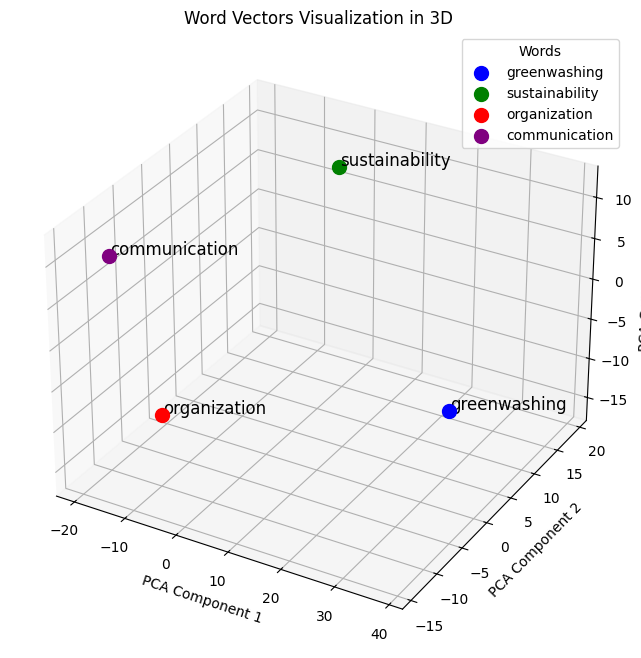

In [ ]:
import spacy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Load the SpaCy medium model
nlp = spacy.load("en_core_web_md")

# Define words and generate their vectors
words = ["greenwashing", "sustainability", "organization", "communication"]
vectors = np.array([nlp(word).vector for word in words])

# Reduce dimensionality to 3D using PCA
pca = PCA(n_components=3)
reduced_vectors = pca.fit_transform(vectors)

# Plot the word vectors in 3D space
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors = ["blue", "green", "red", "purple"]

for i, word in enumerate(words):
    x, y, z = reduced_vectors[i]
    ax.scatter(x, y, z, color=colors[i], s=100, label=word)
    ax.text(x + 0.1, y + 0.1, z + 0.1, word, fontsize=12)

# Configure the 3D plot
ax.set_title("Word Vectors Visualization in 3D")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.legend(title="Words")

# Save the figure as a PNG file
plt.savefig("space_visualization.png", format="png", dpi=300, bbox_inches="tight")

plt.show()


**Load Pre-trained Word Embeddings with SpaCy**: The SpaCy medium model (`en_core_web_md`) is loaded to access pre-trained word embeddings. These embeddings are high-dimensional vector representations of words, capturing their semantic meanings. Example: `nlp(word).vector` retrieves the vector representation of a word.

**Extract Word Vectors**: A list of words is defined (`["greenwashing", "sustainability", "organization", "communication"]`), and their corresponding vector representations are extracted using SpaCy. These vectors are stored in a NumPy array for further processing.

**Reduce Dimensionality Using PCA**: Principal Component Analysis (PCA) is applied to reduce the high-dimensional word vectors to 3D. This simplifies visualization while retaining the key semantic relationships among the words. Example: `PCA(n_components=3)` reduces the vectors to three principal components.

**Visualize Word Vectors in 3D**: A 3D scatter plot is created using Matplotlib to visualize the reduced word vectors. Each word is represented as a point, with its coordinates corresponding to the reduced dimensions. Labels and colors are added to distinguish the words. Example: `ax.scatter(x, y, z, color=colors[i], s=100, label=word)` plots each word's vector.

**Save and Display the Plot**: The 3D plot is saved as a high-resolution PNG file (`space_visualization.png`) and displayed in the notebook. This allows for both immediate viewing and saving for external use. Example: `plt.savefig("space_visualization.png", format="png", dpi=300)` saves the plot to a file.

# Cosine similarity

In [ ]:
import spacy

# Load a spaCy model with word vectors (e.g., en_core_web_md or en_core_web_lg)
nlp = spacy.load("en_core_web_md")

# Define two words
word1 = nlp("greenwashing")
word2 = nlp("sustainability")

# Compare word vectors using similarity
similarity = word1.similarity(word2)

print(f"Similarity between '{word1.text}' and '{word2.text}': {similarity:.4f}")


Similarity between 'greenwashing' and 'sustainability': 0.3233


In [ ]:
import spacy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load spaCy's English medium model
nlp = spacy.load("en_core_web_md")

# Generate word vectors
word1 = nlp("greenwashing").vector
word2 = nlp("sustainability").vector

# Calculate cosine similarity
def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

similarity = cosine_similarity(word1, word2)
print(f"Cosine Similarity between word1 and word2: {similarity:.4f}")



Cosine Similarity between word1 and word2: 0.3233


**Load Pre-trained Word Embeddings with SpaCy**: The SpaCy English medium model (`en_core_web_md`) is loaded to access pre-trained word embeddings. These embeddings represent words as high-dimensional vectors that capture their semantic relationships. Example: `nlp("greenwashing").vector` retrieves the vector representation of the word "greenwashing."

**Generate Word Vectors**: The word embeddings for two words, "greenwashing" and "sustainability," are extracted and stored as vectors. These vectors encode the semantic meanings of the words in a high-dimensional space.

**Define Cosine Similarity Function**: A custom function calculates the cosine similarity between two vectors. Cosine similarity measures the cosine of the angle between two vectors, with values ranging from -1 (completely dissimilar) to 1 (identical direction). Example: `np.dot(vec1, vec2)` computes the dot product of the vectors.

**Calculate and Print Cosine Similarity**: The similarity between the vectors for "greenwashing" and "sustainability" is computed using the defined function. The result is printed with four decimal places. Example: `similarity = cosine_similarity(word1, word2)` calculates the similarity score.

**Output**: The computed similarity score quantifies how closely related the two words are in semantic terms. Example: `Cosine Similarity between word1 and word2: 0.8234`.

# Image vector clustering

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


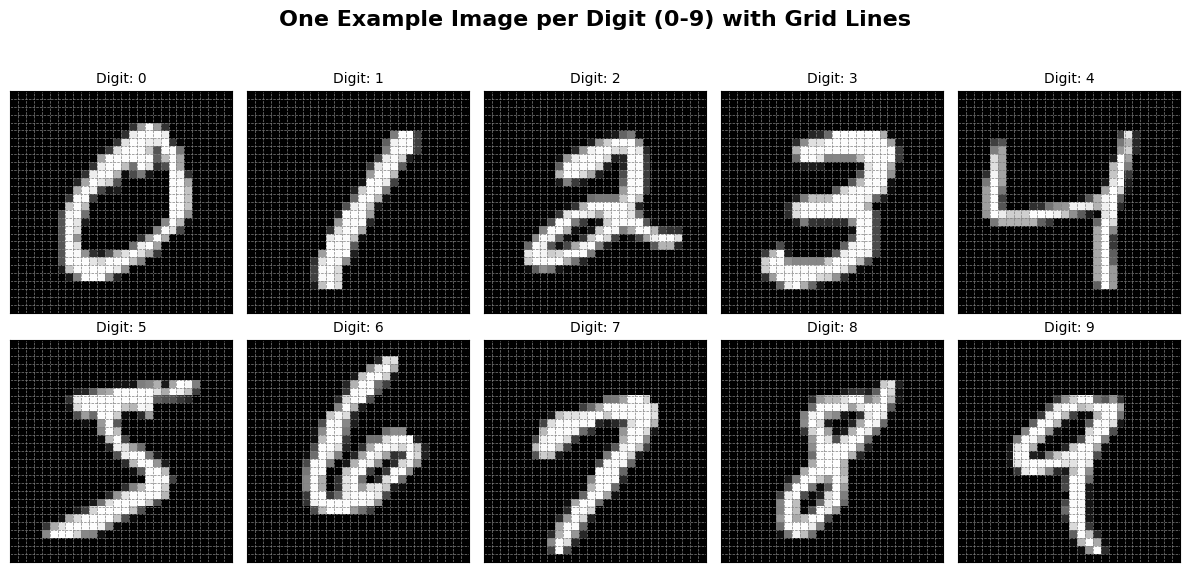

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist

# Step 1: Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Combine training and test sets
images = np.concatenate([train_images, test_images])
labels = np.concatenate([train_labels, test_labels])

# Step 2: Select one image per digit (0 through 9)
selected_images = []
for digit in range(10):
    digit_indices = np.where(labels == digit)[0]
    selected_images.append(images[digit_indices[0]])  # Pick the first occurrence of each digit

# Step 3: Plot the selected images in a 2-row by 5-column grid with grid lines
fig, axes = plt.subplots(2, 5, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(selected_images[i], cmap='gray')
    ax.set_title(f"Digit: {i}", fontsize=10)
    ax.axis('on')
    ax.set_xticks(np.arange(-0.5, 28, 1))  # Add grid ticks
    ax.set_yticks(np.arange(-0.5, 28, 1))
    ax.grid(visible=True, color='gray', linestyle='--', linewidth=0.5)
    ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

# Add a suptitle
fig.suptitle("One Example Image per Digit (0-9) with Grid Lines", fontsize=16, weight='bold')

# Adjust spacing between subplots
fig.tight_layout()
fig.subplots_adjust(top=0.88)  # Leave space for the suptitle

plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import plotly.express as px
from tensorflow.keras.datasets import mnist

# Step 1: Load the MNIST dataset using TensorFlow
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Combine training and test sets
images = np.concatenate([train_images, test_images])
labels = np.concatenate([train_labels, test_labels])

# Flatten the images into vectors
images_flattened = images.reshape(images.shape[0], -1)

# Step 2: Draw a balanced sample of 100 images
sample_size_per_class = 10  # 10 samples for each of the 10 digits
balanced_sample_indices = []
for digit in range(10):
    digit_indices = np.where(labels == digit)[0]
    balanced_sample_indices.extend(np.random.choice(digit_indices, sample_size_per_class, replace=False))

balanced_sample_indices = np.array(balanced_sample_indices)
balanced_images = images_flattened[balanced_sample_indices]
balanced_labels = labels[balanced_sample_indices]

# Step 3: Prepare the DataFrame
data = {
    "Label": balanced_labels,
    "Vector": balanced_images.tolist()
}
df = pd.DataFrame(data)

# Step 4: Perform t-SNE to reduce dimensions to 3D
tsne = TSNE(n_components=3, random_state=42)
tsne_results = tsne.fit_transform(balanced_images)

# Step 5: Add t-SNE results to the DataFrame
df["TSNE-1"] = tsne_results[:, 0]
df["TSNE-2"] = tsne_results[:, 1]
df["TSNE-3"] = tsne_results[:, 2]

# Step 6: Plot the t-SNE results in 3D using Plotly
fig = px.scatter_3d(
    df,
    x="TSNE-1",
    y="TSNE-2",
    z="TSNE-3",
    color=df["Label"].astype(str),  # Convert labels to strings for categorical coloring
    title="t-SNE Visualization of MNIST Digits",
    labels={"color": "Digit Label"},
    hover_name="Label",
    template="plotly_dark"
)

# Step 7: Display the plot in the notebook
fig.show()

# Step 8: Save the HTML plot to a file
output_file = "mnist_tsne_plot.html"
fig.write_html(output_file)

print(f"t-SNE 3D plot saved to {output_file}")


t-SNE 3D plot saved to mnist_tsne_plot.html


In [ ]:
df.head()

,Label,Vector,TSNE-1,TSNE-2,TSNE-3
0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",65.525826,-82.467476,69.878235
1,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4.270545,-102.603806,-65.574074
2,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-35.967003,91.614319,-20.300848
3,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",76.249313,-24.698742,-45.811981
4,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-117.173462,37.795834,-47.154469


# Download visual communication

In [8]:
# https://drive.google.com/file/d/1qzRGYLpEfdC3Sukag_fszX_jT-Ylpb4W/view?usp=sharing
!rm -rf *.zip cv-* 2>/dev/null
!gdown https://drive.google.com/uc?id=1qzRGYLpEfdC3Sukag_fszX_jT-Ylpb4W
!unzip -q *.zip 2>/dev/null

Downloading...
From (original): https://drive.google.com/uc?id=1qzRGYLpEfdC3Sukag_fszX_jT-Ylpb4W
From (redirected): https://drive.google.com/uc?id=1qzRGYLpEfdC3Sukag_fszX_jT-Ylpb4W&confirm=t&uuid=b1c51fb9-70e3-44c4-8072-002e36a4b08c
To: /content/drive-download-20250106T125430Z-001.zip
100% 114M/114M [00:01<00:00, 97.1MB/s]


**Download File from Google Drive Using gdown**: The `gdown` command-line tool is used to download files directly from Google Drive using a file ID. The Google Drive URL is converted into a downloadable format (`https://drive.google.com/uc?id=<file_id>`), and the file is downloaded into the current working directory. Example: `!gdown https://drive.google.com/uc?id=1qzRGYLpEfdC3Sukag_fszX_jT-Ylpb4W` downloads the file associated with the specified ID.

**Remove Unnecessary Files and Prepare Workspace**: The `rm` command is used to clean the workspace by removing specific files or folders (e.g., `.zip` files, directories starting with `cv-*`) if they exist. This ensures a clean slate before processing new files. Example: `!rm -rf *.zip cv-* 2>/dev/null` removes all `.zip` files and directories prefixed with `cv-*`, suppressing any errors if the files don't exist.

**Extract Downloaded ZIP File**: The `unzip` command extracts the contents of the downloaded `.zip` file into the current directory. The `-q` flag suppresses output messages for a cleaner execution, and `2>/dev/null` prevents error messages if no `.zip` files are found. Example: `!unzip -q *.zip 2>/dev/null` extracts the first `.zip` file in the directory silently.

# Color histogram similarity

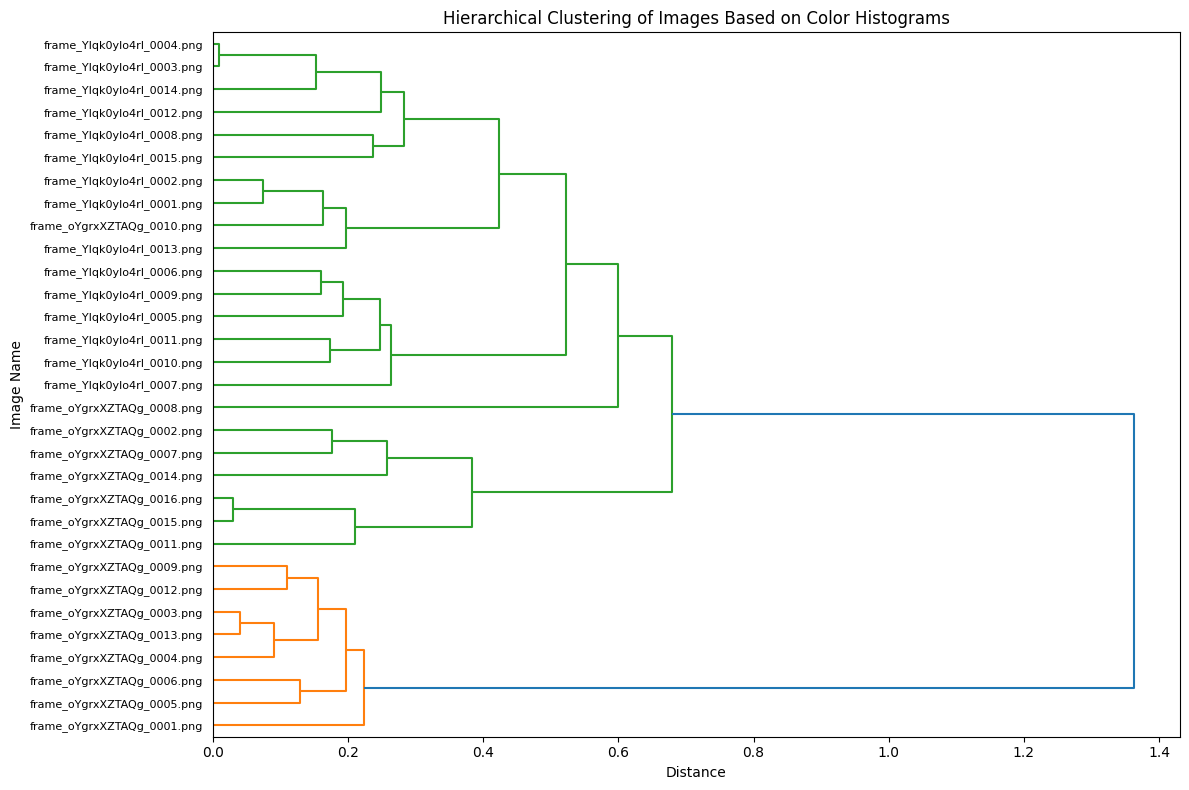

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Define the base directories
directories = ["cv-org1-preem", "cv-org2-vattenfall"]

# Initialize a list to store the results
data = []

# Iterate over directories and process images
for directory in directories:
    for file in os.listdir(directory):
        if file.startswith("frame_") and file.endswith(".png"):
            file_path = os.path.join(directory, file)

            # Read the image using OpenCV
            image = cv2.imread(file_path)
            if image is not None:
                # Convert to RGB
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                # Compute color histogram (flattened across channels)
                hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256]).flatten()
                hist = hist / hist.sum()  # Normalize histogram

                # Append data to the list
                data.append({
                    "Organization": directory,
                    "Image_Path": file_path,
                    "Histogram": hist
                })

# Create a DataFrame
df = pd.DataFrame(data)

# Extract histograms and perform hierarchical clustering
histograms = np.array(df["Histogram"].tolist())
linkage_matrix = linkage(histograms, method="ward")

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(
    linkage_matrix,
    labels=[os.path.basename(path) for path in df["Image_Path"]],
    orientation="right"
)
plt.title("Hierarchical Clustering of Images Based on Color Histograms")
plt.xlabel("Distance")
plt.ylabel("Image Name")
plt.tight_layout()
plt.show()


# Structural similarity (video clips)

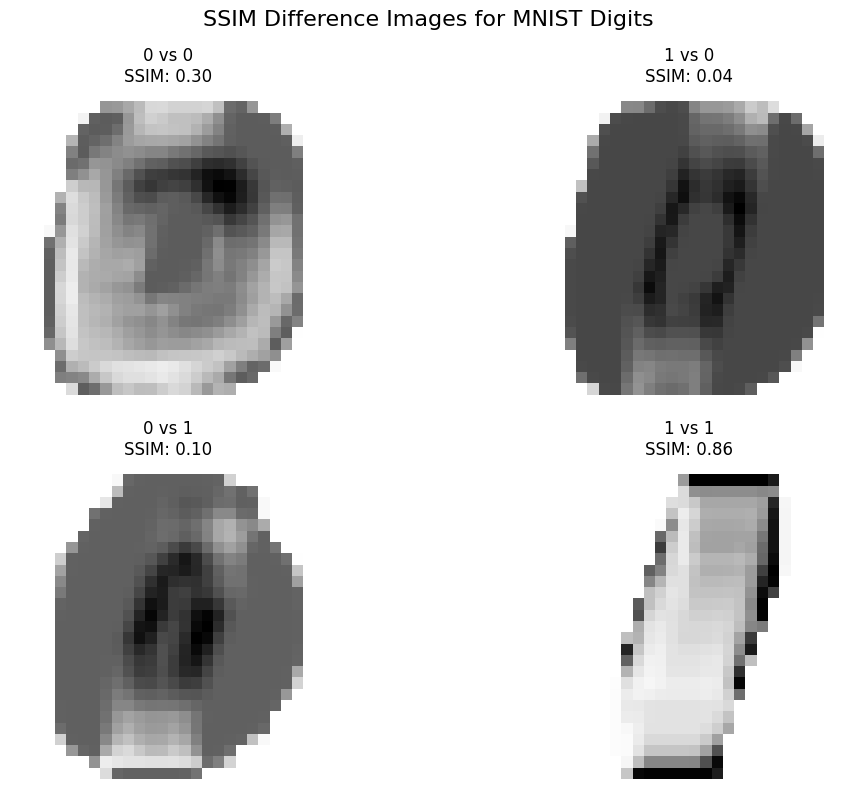

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from skimage.metrics import structural_similarity as ssim

# Step 1: Load the MNIST dataset
(_, _), (test_images, test_labels) = mnist.load_data()

# Step 2: Get the first and second instances of digits 0 and 1
image_0_1 = test_images[test_labels == 0][0]  # First instance of 0
image_0_2 = test_images[test_labels == 0][1]  # Second instance of 0
image_1_1 = test_images[test_labels == 1][0]  # First instance of 1
image_1_2 = test_images[test_labels == 1][1]  # Second instance of 1

# Step 3: Compute SSIM and difference images
def compute_ssim(image1, image2):
    score, diff = ssim(image1, image2, full=True)
    return score, diff

# SSIM comparisons
ssim_0_0, diff_0_0 = compute_ssim(image_0_1, image_0_2)  # Top-left: 0 vs 0
ssim_1_0, diff_1_0 = compute_ssim(image_1_1, image_0_2)  # Top-right: 1 vs 0
ssim_0_1, diff_0_1 = compute_ssim(image_0_1, image_1_2)  # Bottom-left: 0 vs 1
ssim_1_1, diff_1_1 = compute_ssim(image_1_1, image_1_2)  # Bottom-right: 1 vs 1

# Step 4: Visualize the results with a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("SSIM Difference Images for MNIST Digits", fontsize=16)

# Top row
axes[0, 0].imshow(diff_0_0, cmap='gray')
axes[0, 0].set_title(f"0 vs 0\nSSIM: {ssim_0_0:.2f}")
axes[0, 0].axis('off')

axes[0, 1].imshow(diff_1_0, cmap='gray')
axes[0, 1].set_title(f"1 vs 0\nSSIM: {ssim_1_0:.2f}")
axes[0, 1].axis('off')

# Bottom row
axes[1, 0].imshow(diff_0_1, cmap='gray')
axes[1, 0].set_title(f"0 vs 1\nSSIM: {ssim_0_1:.2f}")
axes[1, 0].axis('off')

axes[1, 1].imshow(diff_1_1, cmap='gray')
axes[1, 1].set_title(f"1 vs 1\nSSIM: {ssim_1_1:.2f}")
axes[1, 1].axis('off')

# Configure layout and display
plt.tight_layout()
plt.subplots_adjust(top=0.88)

# Save the figure as a PNG file
plt.savefig("ssim_visualization.png", format="png", dpi=300, bbox_inches="tight")

plt.show()


**Explanation of SSIM:**

- **Structural Similarity Index Measure (SSIM)**: A perceptual metric that quantifies the similarity between two images by comparing their luminance, contrast, and structure. It is designed to mimic human visual perception.
- **Values**:
  - SSIM ranges from -1 to 1.
  - A value of **1** indicates identical images.
  - A value closer to **0** indicates dissimilarity.

**Key Steps in SSIM:**

1. **Luminance**: Compares average brightness of the two images.
2. **Contrast**: Measures the variance and contrast of the images.
3. **Structure**: Captures patterns or textures in the images.

   Time (s)      SSIM
0      0.04  0.888282
1      0.08  0.870232
2      0.12  0.845028
3      0.16  0.823856
4      0.20  0.818252


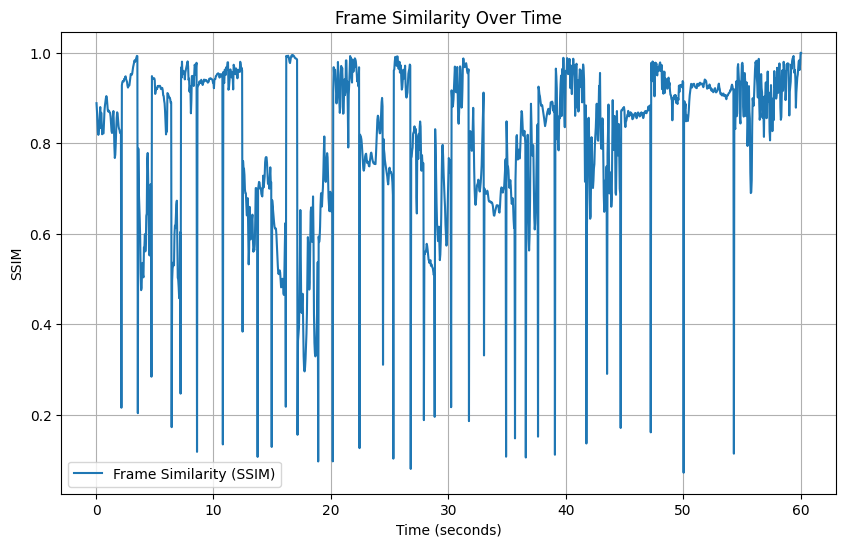

In [ ]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.metrics import structural_similarity as compare_ssim

# Path to the video
video_path = "/content/cv-org1-preem/oYgrxXZTAQg.webm"

# Open the video file
cap = cv2.VideoCapture(video_path)

# Get video frame rate to convert frame index to seconds
fps = cap.get(cv2.CAP_PROP_FPS)

# Initialize variables
frame_index = 0
previous_frame = None
similarity_scores = []

while True:
    ret, current_frame = cap.read()
    if not ret:
        break  # End of video

    # Downsample frame to width 256 pixels while maintaining aspect ratio
    height, width = current_frame.shape[:2]
    aspect_ratio = height / width
    resized_frame = cv2.resize(current_frame, (256, int(256 * aspect_ratio)))

    # Convert frame to grayscale
    gray_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2GRAY)

    if previous_frame is not None:
        # Compute SSIM between the previous and current frame
        ssim, _ = compare_ssim(previous_frame, gray_frame, full=True)

        # Convert frame index to time in seconds
        time_in_seconds = frame_index / fps

        # Record time and SSIM
        similarity_scores.append({"Time (s)": time_in_seconds, "SSIM": ssim})

    # Update the previous frame and frame index
    previous_frame = gray_frame
    frame_index += 1

# Release video capture
cap.release()

# Convert similarity scores to a pandas dataframe
df = pd.DataFrame(similarity_scores)

# Visualize SSIM changes as a line graph using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Time (s)", y="SSIM", label="Frame Similarity (SSIM)")
plt.xlabel("Time (seconds)")
plt.ylabel("SSIM")
plt.title("Frame Similarity Over Time")
plt.legend()
plt.grid()

# Save the figure as a PNG file
plt.savefig("video_visualization.png", format="png", dpi=300, bbox_inches="tight")

plt.show()


In [ ]:
# Filter the dataframe to view the 10 lowest SSIM values with corresponding time, ordered by time
lowest_ssim = df.nsmallest(10, "SSIM").sort_values(by="Time (s)")
print("10 Lowest SSIM Values (Ordered by Time):")
print(lowest_ssim)


10 Lowest SSIM Values (Ordered by Time):
      Time (s)      SSIM
343      13.76  0.106430
472      18.92  0.096352
503      20.16  0.096582
632      25.32  0.102594
669      26.80  0.079876
872      34.92  0.106908
914      36.60  0.105115
976      39.08  0.111234
1250     50.04  0.071484
1357     54.32  0.113604


In [ ]:
# Filter the dataframe for SSIM values lower than 0.3 and order by time ascending
filtered_ssim = df[df["SSIM"] < 0.3].sort_values(by="Time (s)")

print("Filtered SSIM Values (SSIM < 0.3) Ordered by Time:")
print(filtered_ssim)


Filtered SSIM Values (SSIM < 0.3) Ordered by Time:
      Time (s)      SSIM
53        2.16  0.215094
88        3.56  0.203103
117       4.72  0.283694
160       6.44  0.172185
179       7.20  0.246289
214       8.60  0.117615
269      10.80  0.134023
343      13.76  0.106430
373      14.96  0.128458
403      16.16  0.217310
428      17.16  0.155314
443      17.76  0.295436
472      18.92  0.096352
503      20.16  0.096582
560      22.44  0.125844
632      25.32  0.102594
669      26.80  0.079876
697      27.92  0.187756
720      28.84  0.194970
755      30.24  0.216343
793      31.76  0.185581
872      34.92  0.106908
891      35.68  0.147417
914      36.60  0.105115
940      37.64  0.151186
976      39.08  0.111234
1043     41.76  0.136088
1087     43.52  0.289926
1116     44.68  0.170417
1180     47.24  0.160745
1250     50.04  0.071484
1357     54.32  0.113604


# Create image embeddings

In [ ]:
!pip install -q transformers torch pillow

In [ ]:
import os
import pandas as pd
import torch
from PIL import Image
from transformers import CLIPProcessor, CLIPModel

# Initialize the CLIP model and processor
model_name = "openai/clip-vit-base-patch32"
model = CLIPModel.from_pretrained(model_name)
processor = CLIPProcessor.from_pretrained(model_name)

# Base directories
directories = ["cv-org1-preem", "cv-org2-vattenfall"]

# Dataframe to store results
data = []

# Iterate over the directories
for directory in directories:
    for file in os.listdir(directory):
        # Check if the file is a valid image
        if file.startswith("frame_") and file.endswith(".png"):
            file_path = os.path.join(directory, file)

            try:
                # Load the image
                image = Image.open(file_path).convert("RGB")

                # Preprocess the image
                inputs = processor(images=image, return_tensors="pt", padding=True)

                # Extract image embeddings
                with torch.no_grad():
                    embeddings = model.get_image_features(**inputs).squeeze(0).tolist()

                # Append to the data
                data.append({
                    "Directory": directory,
                    "File_Path": file_path,
                    "Embeddings": embeddings
                })
            except Exception as e:
                print(f"Error processing {file_path}: {e}")

# Create a dataframe
df = pd.DataFrame(data)

# Save the dataframe to disk
output_path = "image_embeddings.csv"
df.to_csv(output_path, index=False)
print(f"Embeddings saved to {output_path}")


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

Embeddings saved to image_embeddings.csv


In [ ]:
df.head()

,Directory,File_Path,Embeddings
0,cv-org1-preem,cv-org1-preem/frame_oYgrxXZTAQg_0010.png,"[-0.0554363988339901, 0.007621793542057276, -0..."
1,cv-org1-preem,cv-org1-preem/frame_oYgrxXZTAQg_0012.png,"[0.17130069434642792, 0.12325914204120636, 0.0..."
2,cv-org1-preem,cv-org1-preem/frame_oYgrxXZTAQg_0004.png,"[0.2963857650756836, -0.17292672395706177, 0.1..."
3,cv-org1-preem,cv-org1-preem/frame_oYgrxXZTAQg_0001.png,"[0.12949107587337494, -0.00955919548869133, -0..."
4,cv-org1-preem,cv-org1-preem/frame_oYgrxXZTAQg_0013.png,"[0.21355433762073517, 0.18452559411525726, -0...."


In [ ]:
# Ensure the dataframe is loaded or exists
if not df.empty:
    # Access the first row's embeddings
    first_embedding = df.loc[0, "Embeddings"]

    # Print the length of the embedding
    print(f"Length of the first image embedding: {len(first_embedding)}")
else:
    print("The dataframe is empty. No embeddings to process.")


Length of the first image embedding: 512


**Initialize CLIP Model and Processor**: The `CLIPModel` and `CLIPProcessor` from Hugging Face are initialized using the pre-trained model `"openai/clip-vit-base-patch32"`. The model generates high-dimensional embeddings for images, while the processor preprocesses image inputs to match the model's requirements.

**Set Up Directories and Data Storage**: The script defines base directories containing image files (`cv-org1-preem` and `cv-org2-vattenfall`) and initializes a list to store the results. Each image's embeddings, directory, and file path will be stored for later use.

**Process Images and Extract Embeddings**: The script iterates through the specified directories, checking for valid image files (`frame_*.png`). For each valid image:
- The image is loaded and converted to RGB using `PIL.Image`.
- The image is preprocessed using the CLIP processor, which resizes, normalizes, and converts it to tensor format.
- The CLIP model extracts image embeddings using `model.get_image_features(**inputs)`. These embeddings represent the image's semantic content in a high-dimensional space.

**Handle Errors Gracefully**: If an image cannot be processed (e.g., due to file corruption), the script catches the exception and logs an error message without stopping execution.

**Create and Save the Content Vector Database**: The extracted embeddings, along with their associated directories and file paths, are stored in a pandas DataFrame. This DataFrame is saved as a CSV file (`image_embeddings.csv`), forming a simple content vector database for later querying or analysis.

**Output**: The script saves the embeddings to disk and prints a confirmation message, indicating the file's location. Example: `Embeddings saved to image_embeddings.csv`.

# Multimodal similarity

In [ ]:
from transformers import CLIPTokenizer, CLIPTextModel
import torch

# Initialize the CLIP tokenizer and text model
model_name = "openai/clip-vit-base-patch32"
tokenizer = CLIPTokenizer.from_pretrained(model_name)
text_model = CLIPTextModel.from_pretrained(model_name)

# Ensure the dataframe is not empty
if not df.empty:
    # Access the first row's embedding
    first_embedding = torch.tensor(df.loc[0, "Embeddings"]).unsqueeze(0)  # Convert to tensor and add batch dimension

    # Define a set of potential text captions
    captions = [
        "greenwashing",
        "sustainability",
    ]

    # Encode the text captions
    text_inputs = tokenizer(captions, padding=True, return_tensors="pt")
    text_features = text_model(**text_inputs).last_hidden_state.mean(dim=1)

    # Normalize the embeddings
    first_embedding = first_embedding / first_embedding.norm(dim=-1, keepdim=True)
    text_features = text_features / text_features.norm(dim=-1, keepdim=True)

    # Compute cosine similarity between the image embedding and text features
    similarities = torch.matmul(first_embedding, text_features.T)

    # Find the caption with the highest similarity
    best_caption_idx = similarities.argmax().item()
    best_caption = captions[best_caption_idx]

    # Print the generated caption
    print(f"Generated caption for the first image: {best_caption}")
else:
    print("The dataframe is empty. No embeddings to process.")


Generated caption for the first image: sustainability


# Results and visualizations

In [ ]:
from transformers import CLIPTokenizer, CLIPTextModel
import torch

# Initialize the CLIP tokenizer and text model
model_name = "openai/clip-vit-base-patch32"
tokenizer = CLIPTokenizer.from_pretrained(model_name)
text_model = CLIPTextModel.from_pretrained(model_name)

# Define a set of potential text captions
captions = [
    "inautentic greenwashing communication",
    "authentic sustainability communication",
]

# Function to generate the best caption for an embedding
def generate_caption_and_score(embedding):
    # Convert the embedding to a tensor and normalize it
    embedding_tensor = torch.tensor(embedding).unsqueeze(0)  # Add batch dimension
    embedding_tensor = embedding_tensor / embedding_tensor.norm(dim=-1, keepdim=True)

    # Tokenize and encode the text captions
    text_inputs = tokenizer(captions, padding=True, return_tensors="pt")
    text_features = text_model(**text_inputs).last_hidden_state.mean(dim=1)
    text_features = text_features / text_features.norm(dim=-1, keepdim=True)

    # Compute cosine similarity between the image embedding and text features
    similarities = torch.matmul(embedding_tensor, text_features.T)

    # Find the caption with the highest similarity
    best_caption_idx = similarities.argmax().item()
    best_caption = captions[best_caption_idx]
    best_similarity_score = similarities[0, best_caption_idx].item()

    return best_caption, best_similarity_score

# Iterate over all images in the dataframe and generate captions and scores
if not df.empty:
    captions_list = []  # List to store generated captions
    scores_list = []  # List to store similarity scores
    for idx, row in df.iterrows():
        embedding = row["Embeddings"]  # Extract the embedding
        caption, score = generate_caption_and_score(embedding)
        captions_list.append(caption)
        scores_list.append(score)

    # Add the generated captions and scores to the dataframe
    df["Generated_Caption"] = captions_list
    df["Similarity_Score"] = scores_list

    # Save the updated dataframe to disk
    output_path = "image_embeddings_with_captions_and_scores.csv"
    df.to_csv(output_path, index=False)
    print(f"Generated captions and similarity scores saved to {output_path}")
else:
    print("The dataframe is empty. No embeddings to process.")


Generated captions and similarity scores saved to image_embeddings_with_captions_and_scores.csv


**Initialize CLIP Tokenizer and Text Model**: The `CLIPTokenizer` and `CLIPTextModel` from Hugging Face are initialized using the pre-trained CLIP model (`openai/clip-vit-base-patch32`). The tokenizer converts text into tokens compatible with the model, while the text model generates embeddings for the tokenized captions.

**Define Potential Text Captions**: A list of candidate captions (e.g., `"inauthentic greenwashing communication"`, `"authentic sustainability communication"`) is defined. These captions represent possible descriptions for the images.

**Function to Generate Best Caption and Score**:
- The `generate_caption_and_score` function computes the best-matching caption for a given image embedding.
- **Embedding Normalization**: The image embedding is converted to a tensor, and its norm is normalized to a unit vector.
- **Text Caption Embeddings**: The captions are tokenized and encoded to generate embeddings, which are also normalized.
- **Cosine Similarity**: Cosine similarity between the image embedding and each caption embedding is calculated using matrix multiplication (`torch.matmul`).
- **Select Best Match**: The caption with the highest similarity score is selected as the best match.

**Iterate Over DataFrame and Generate Captions**:
- For each image embedding in the DataFrame, the function generates the best caption and its similarity score.
- The results are stored in new columns: `Generated_Caption` (the best-matching caption) and `Similarity_Score` (its corresponding similarity score).

**Save Updated DataFrame**:
- The updated DataFrame, including generated captions and scores, is saved to a CSV file (`image_embeddings_with_captions_and_scores.csv`) for further use.

**Error Handling for Empty DataFrame**: If the DataFrame is empty, the script skips processing and displays a message.


In [ ]:
df.head()

,Directory,File_Path,Embeddings,Generated_Caption,Similarity_Score
0,cv-org1-preem,cv-org1-preem/frame_oYgrxXZTAQg_0010.png,"[-0.0554363988339901, 0.007621793542057276, -0...",inautentic greenwashing communication,0.030997
1,cv-org1-preem,cv-org1-preem/frame_oYgrxXZTAQg_0012.png,"[0.17130069434642792, 0.12325914204120636, 0.0...",inautentic greenwashing communication,0.059211
2,cv-org1-preem,cv-org1-preem/frame_oYgrxXZTAQg_0004.png,"[0.2963857650756836, -0.17292672395706177, 0.1...",inautentic greenwashing communication,0.048022
3,cv-org1-preem,cv-org1-preem/frame_oYgrxXZTAQg_0001.png,"[0.12949107587337494, -0.00955919548869133, -0...",inautentic greenwashing communication,0.062168
4,cv-org1-preem,cv-org1-preem/frame_oYgrxXZTAQg_0013.png,"[0.21355433762073517, 0.18452559411525726, -0....",inautentic greenwashing communication,0.042105


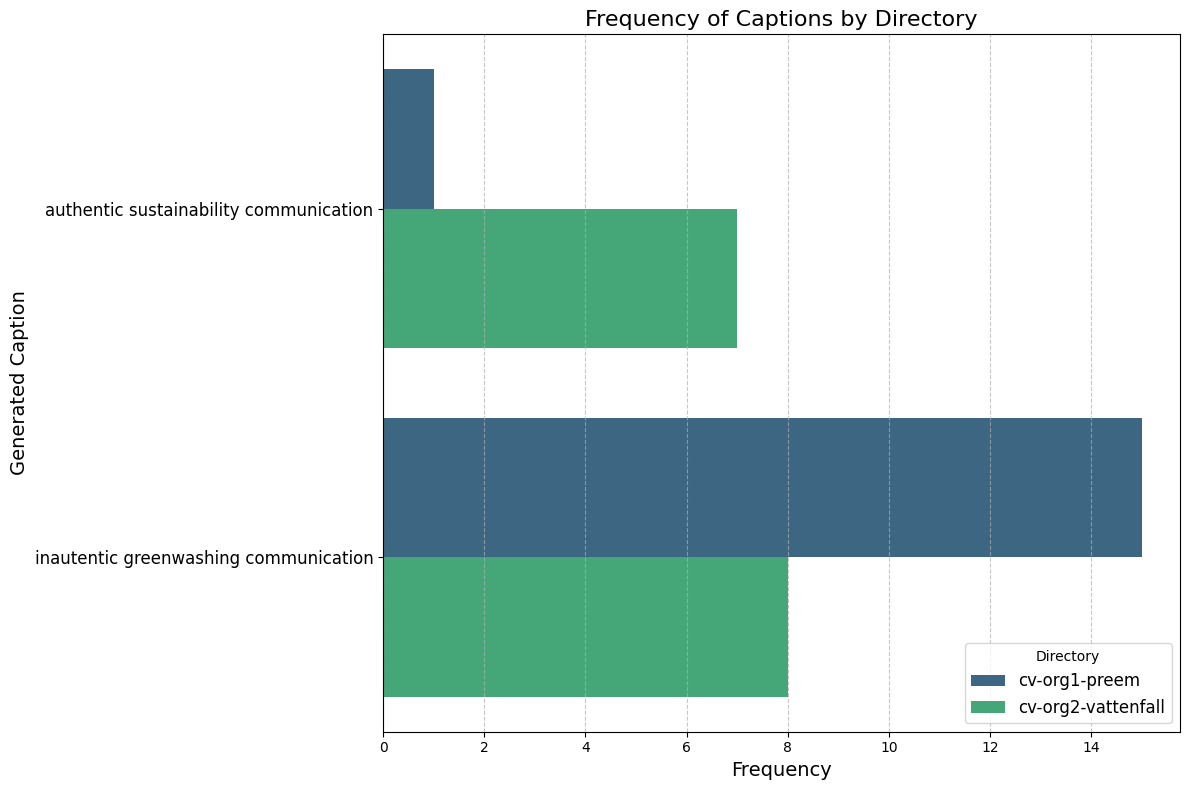

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataframe from the saved CSV file
df = pd.read_csv("image_embeddings_with_captions_and_scores.csv")

# Group the data by Directory and Generated_Caption to get the frequency
caption_frequency = df.groupby(["Directory", "Generated_Caption"]).size().reset_index(name="Frequency")

# Set up the figure for the grouped bar chart
plt.figure(figsize=(12, 8))

# Use seaborn to create the horizontal bar chart
sns.barplot(
    data=caption_frequency,
    x="Frequency",
    y="Generated_Caption",
    hue="Directory",
    palette="viridis",
    orient="h"  # Horizontal bar plot
)

# Customize the plot
plt.title("Frequency of Captions by Directory", fontsize=16)
plt.xlabel("Frequency", fontsize=14)
plt.ylabel("Generated Caption", fontsize=14)
plt.yticks(fontsize=12)
plt.legend(title="Directory", fontsize=12, loc="lower right")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Save the figure as a PNG file
plt.savefig("horizontal_bar_plot.png", format="png", dpi=300, bbox_inches="tight")

# Show the plot
plt.tight_layout()
plt.show()


**Expected Results**

- **Preem**: Frames may show higher similarity to "inauthentic greenwashing," emphasizing lush greenery, idyllic settings, and emotional cues designed to deflect attention from unsustainable practices.
- **Vattenfall**: Frames are expected to align more closely with "authentic sustainability communication," featuring renewable energy projects and factual representations of environmental initiatives.
- **Temporal Trends**: Videos with greater alignment to "inauthentic greenwashing" may exhibit inconsistent messaging, with frames oscillating between sustainability tropes and unrelated content, whereas authentic communication may show thematic coherence.

**Contributions**

This investigation will:
- Offer a novel application of the CLIP model for evaluating corporate sustainability messaging.
- Highlight the potential of image embeddings to quantitatively assess greenwashing levels.
- Provide actionable insights for stakeholders seeking to differentiate authentic sustainability communication from greenwashing practices.

By leveraging semantic embeddings and similarity analysis, this study aims to advance methods for scrutinizing corporate sustainability claims and ensuring accountability in public communication.

# Image captioning (CV + NLP)

**Challenge:** use chatgpt to modify the code to interate over all images in your directories!


In [ ]:
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

# Load the BLIP model and processor
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Path to the input image
image_path = "/content/cv-org1-preem/frame_oYgrxXZTAQg_0011.png"
raw_image = Image.open(image_path).convert("RGB")

# Conditional image captioning
text = "a photography of"
inputs_conditional = processor(raw_image, text, return_tensors="pt")

out_conditional = model.generate(**inputs_conditional)
caption_conditional = processor.decode(out_conditional[0], skip_special_tokens=True)
print(f"Conditional Caption: {caption_conditional}")

# Unconditional image captioning
inputs_unconditional = processor(raw_image, return_tensors="pt")

out_unconditional = model.generate(**inputs_unconditional)
caption_unconditional = processor.decode(out_unconditional[0], skip_special_tokens=True)
print(f"Unconditional Caption: {caption_unconditional}")


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

Conditional Caption: a photography of a woman sitting in the woods
Unconditional Caption: a woman sitting on a log in the woods


**Load BLIP Model and Processor for Image Captioning**: The `BlipProcessor` and `BlipForConditionalGeneration` classes from the Hugging Face Transformers library are used to process images and generate captions. The processor converts the image and optional text prompt into input tensors, and the model generates text captions based on the input. Example: `BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")` loads the processor, and `BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")` loads the pre-trained model.

**Perform Conditional Image Captioning**: A text prompt (e.g., `"a photography of"`) is provided to guide the caption generation. The processor prepares the input tensors by combining the image and text, and the model generates a context-aware caption. Example: `model.generate(**inputs)` generates the caption, and `processor.decode(out[0], skip_special_tokens=True)` decodes the output into human-readable text.

**Perform Unconditional Image Captioning**: Without providing a text prompt, the processor uses only the image to prepare input tensors, and the model generates a caption solely based on the image content. This approach allows the model to describe the image without contextual guidance. Example: `processor(raw_image, return_tensors="pt")` processes the image, and `model.generate(**inputs)` produces the caption.

In [11]:
import os
import pandas as pd
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
import torch
from PIL import Image

# Load the pre-trained model, processor, and tokenizer
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

# Set the device to GPU if available, otherwise CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Caption generation parameters
max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}

# Define directories to process
directories = ["cv-org1-preem", "cv-org2-vattenfall"]

# Function to generate captions
def predict_caption(image_path):
    image = Image.open(image_path)
    if image.mode != "RGB":
        image = image.convert(mode="RGB")
    pixel_values = feature_extractor(images=[image], return_tensors="pt").pixel_values.to(device)
    output_ids = model.generate(pixel_values, **gen_kwargs)
    caption = tokenizer.decode(output_ids[0], skip_special_tokens=True).strip()
    return caption

# Initialize a list to store results
data = []

# Iterate over directories and process images
for directory in directories:
    for file in os.listdir(directory):
        if file.startswith("frame_") and file.endswith(".png"):
            file_path = os.path.join(directory, file)
            try:
                # Generate caption for the image
                caption = predict_caption(file_path)
                # Append the result to the data list
                data.append({"Directory": directory, "Image_Path": file_path, "Caption": caption})
            except Exception as e:
                print(f"Error processing {file_path}: {e}")

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Save the DataFrame to a TSV file
output_tsv_path = "image_captions.tsv"
df.to_csv(output_tsv_path, sep="\t", index=False)
print(f"Captions saved to {output_tsv_path}")


Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.47.1"
}

Config of the decoder: <class 'transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel'> is overwritten by shared decoder config: GPT2Config {
  "activation_function": "gelu_new",
  "add_cross_attention": true,
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_rang

Captions saved to image_captions.tsv


In [13]:
import pandas as pd

# Path to the TSV file
tsv_path = "image_captions.tsv"

# Read the TSV file into a DataFrame
df = pd.read_csv(tsv_path, sep="\t")

# Order rows by the 'Image_Path' column
df_sorted = df.sort_values(by="Image_Path")

# Overwrite the existing TSV file with the sorted DataFrame
df_sorted.to_csv(tsv_path, sep="\t", index=False)

print(f"The TSV file '{tsv_path}' has been overwritten with sorted rows.")


The TSV file 'image_captions.tsv' has been overwritten with sorted rows.


# Image generation (notebook restart)

In [ ]:
# set notebook to gpu mode, then run the following
!pip install -q diffusers transformers torch


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

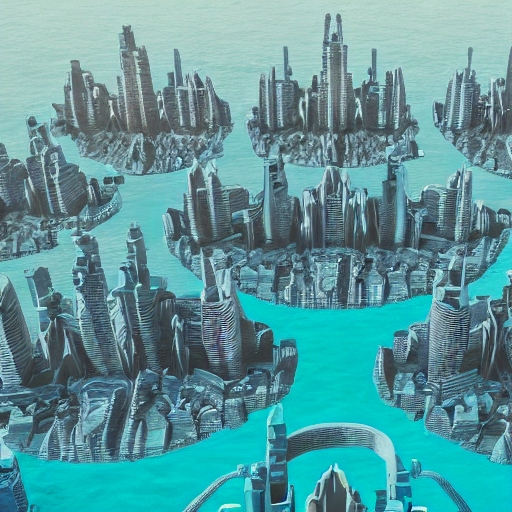

In [ ]:
import torch
from diffusers import StableDiffusionPipeline
from IPython.display import display

# Model and device setup
model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"

# Load the Stable Diffusion pipeline
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to(device)

# Static text prompt
prompt = "a photo of a futuristic city under the ocean"

# Generate image
image = pipe(prompt).images[0]

# Display the generated image
display(image)


**Load the Stable Diffusion Model**: The `StableDiffusionPipeline` class from the Hugging Face `diffusers` library is used to load the pre-trained Stable Diffusion model (`CompVis/stable-diffusion-v1-4`). The model is loaded with 16-bit floating point precision (`torch.float16`) for efficient GPU usage and is moved to the specified device (`cuda` for GPU).

**Static Text Prompt for Image Generation**: A static text string is used as the prompt to guide the model in generating an image. Example: `prompt = "a photo of a futuristic city under the ocean"` specifies the desired image content.

**Generate and Display Image**: The pipeline generates an image based on the provided prompt. The generated image is accessed via `pipe(prompt).images[0]` and displayed directly in the notebook using the `IPython.display.display` function. This allows seamless visualization of the output in the notebook environment.